In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Binary Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df_1 = _deepnote_execute_sql('SELECT *\nFROM \'dataset_phishing.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [3]:
df = pd.read_csv('dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [4]:
class_map = {'legitimate':0, 'phishing':1}
df['status'] = df['status'].map(class_map)
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [5]:
def feature_selector_correlation(cmatrix, threshold):
    
    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score)) 
    return result

In [6]:
df = df.drop('url', axis=1)
corr_matrix = df.corr()
status_corr = corr_matrix['status']

features_selected = feature_selector_correlation(status_corr, 0.20)
print(features_selected)
selected_features = [i for (i,j) in features_selected if i != 'status']
selected_features

[('length_url', ['0.248580']), ('length_hostname', ['0.238322']), ('ip', ['0.321698']), ('nb_dots', ['0.207029']), ('nb_qm', ['0.294319']), ('nb_eq', ['0.233386']), ('nb_slash', ['0.242270']), ('nb_www', ['-0.443468']), ('ratio_digits_url', ['0.356395']), ('ratio_digits_host', ['0.224335']), ('tld_in_subdomain', ['0.208884']), ('prefix_suffix', ['0.214681']), ('shortest_word_host', ['0.223084']), ('longest_words_raw', ['0.200147']), ('longest_word_path', ['0.212709']), ('phish_hints', ['0.335393']), ('nb_hyperlinks', ['-0.342628']), ('ratio_intHyperlinks', ['-0.243982']), ('empty_title', ['0.207043']), ('domain_in_title', ['0.342807']), ('domain_age', ['-0.331889']), ('google_index', ['0.731171']), ('page_rank', ['-0.511137']), ('status', ['1.000000'])]


['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'phish_hints',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'empty_title',
 'domain_in_title',
 'domain_age',
 'google_index',
 'page_rank']

In [7]:
features_requiring_additional_data = [
    'phish_hints',
    'nb_hyperlinks',
    'empty_title',
    'google_index',
    'page_rank',
    'domain_in_title',
    'ratio_intHyperlinks',
    'ip'
]
selected_features = [feature for feature in selected_features if feature not in features_requiring_additional_data]
selected_features

['length_url',
 'length_hostname',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'domain_age']

In [8]:
X_selected = df[selected_features]
X_selected

,length_url,length_hostname,nb_dots,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,ratio_digits_host,tld_in_subdomain,prefix_suffix,shortest_word_host,longest_words_raw,longest_word_path,domain_age
0,37,19,3,0,0,3,1,0.000000,0.000000,0,0,3,11,6,-1
1,77,23,1,0,0,5,0,0.220779,0.000000,0,0,19,32,32,5767
2,126,50,4,1,3,5,0,0.150794,0.000000,1,1,3,17,17,4004
3,18,11,2,0,0,2,0,0.000000,0.000000,0,0,5,5,0,-1
4,55,15,2,0,0,5,1,0.000000,0.000000,0,0,3,11,11,8175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,2,0,0,4,1,0.000000,0.000000,0,0,3,11,11,5396
11426,84,18,5,1,1,5,1,0.023810,0.000000,0,0,3,10,8,6728
11427,105,16,2,1,1,5,1,0.142857,0.000000,0,0,3,15,15,8515
11428,38,30,2,0,0,3,1,0.000000,0.000000,0,0,3,22,0,2836


In [9]:
y = df['status']
y

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)

In [11]:
model_random_forest = RandomForestClassifier(n_estimators=350,
                                             random_state=42,
                                            )
model_random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

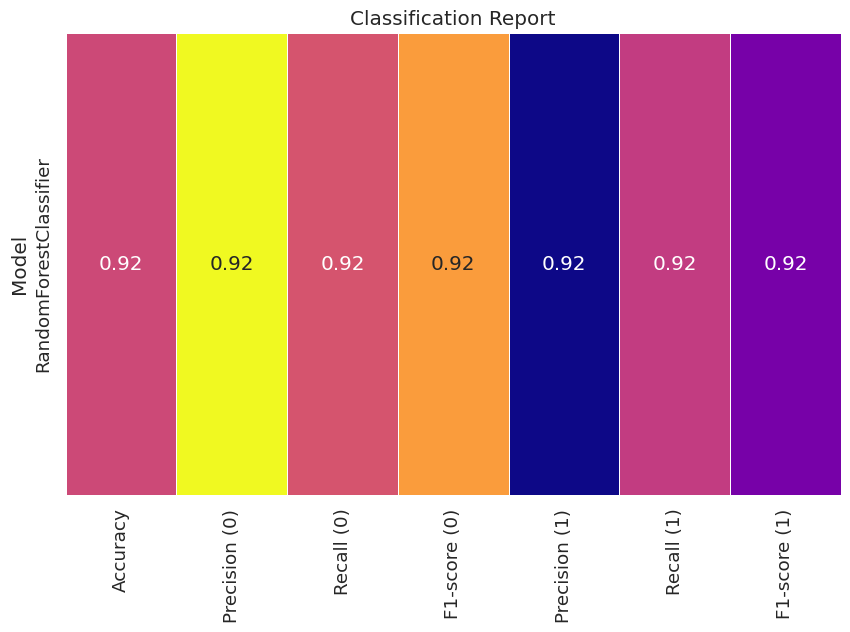

In [12]:
y_pred = model_random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

results = []
results.append({
    "Model": model_random_forest.__class__.__name__,
    "Accuracy": accuracy,
    "Precision (0)": report['0']['precision'],
    "Recall (0)": report['0']['recall'],
    "F1-score (0)": report['0']['f1-score'],
    "Precision (1)": report['1']['precision'],
    "Recall (1)": report['1']['recall'],
    "F1-score (1)": report['1']['f1-score']
})

sns.set(font_scale=1.2)
plt.figure(figsize=(10, 6))
table = sns.heatmap(pd.DataFrame(results).set_index('Model'), annot=True, cmap="plasma", fmt=".2f", linewidths=.5, cbar=False)
plt.title("Classification Report")
plt.show()

In [13]:
from joblib import dump
dump(model_random_forest, 'best_model.joblib')

['best_model.joblib']

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=79c03a17-d098-48cd-b068-12d34a13818f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>